# Milestone 1 - Dataset Exploration 

## Introduction to the Dataset

### Context and Introduction  
The **US Drought & Meteorological Data** dataset, available on [Kaggle](https://www.kaggle.com/datasets/cdminix/us-drought-meteorological-data/data), combines meteorological indicators with drought severity levels from the **U.S. Drought Monitor**. It was created to support data-driven drought prediction by linking weather conditions with expert-assessed drought categories (D0–D4) and no drought at all. Each observation corresponds to a specific county in the United States, identified by its FIPS code, and includes various climatic features, daily obtained, such as temperature, precipitation, humidity, wind speed, and soil moisture, which will be explained later.

The dataset integrates information from the **National Drought Mitigation Center (NDMC)**, **NOAA**, and **USDA**, which produce weekly drought classifications based on multiple climate variables such as precipitation, temperature, and soil moisture.  
Meteorological data were aggregated and aligned with these drought severity labels to enable **machine learning applications in climate and environmental monitoring**.

The dataset is already divided into three subsets:
- **Training Set:** Contains historical data from 2000 to 2016, used to train machine learning models.  
- **Validation Set:** Contains data from 2017 to 2018, used for hyperparameter tuning and model selection.  
- **Test Set:** Contains data from 2019 to 2020, used to test the model accuracy prediction.

All the subsets contain the same feature structure and data organization. For the context of this project, as explained later, it will be used this splitting format.

**Application Domain:** This dataset belongs to the domain of **climate science and environmental modeling**, with key applications in:
- Drought risk assessment and early warning systems  
- Agricultural and water resource management  
- Climate variability analysis  

### Features Overview 
All dataset contains **19 meteorological indicators**, a **date column**, a **county identifier (`fips`)**, and a **target variable (`score`)** representing drought severity.  

- **Total entries:** 23841468 - *19300680 (training dataset), 2268840 (validation dataset), 2271948 (test dataset)*
- **Total columns:** 21  
- **Temporal coverage:** Daily observations across multiple U.S. counties  
- **Target variable:** `score` — representing drought severity intensity (ordinal numeric scale)  

| Feature | Description | Type | Unit |
|----------|--------------|------|------|
| `fips` | FIPS code identifying the USA county | int64 | – |
| `date` | Observation date | object | YYYY-MM-DD |
| `PRECTOT` | Total Precipitation | float64 | mm/day |
| `PS` | Surface Pressure | float64 | kPa |
| `QV2M` | Specific Humidity at 2 Meters | float64 | g/kg |
| `T2M` | Air Temperature at 2 Meters | float64 | °C |
| `T2MDEW` | Dew/Frost Point Temperature at 2 Meters | float64 | °C |
| `T2MWET` | Wet Bulb Temperature at 2 Meters | float64 | °C |
| `T2M_MAX` | Maximum Temperature at 2 Meters | float64 | °C |
| `T2M_MIN` | Minimum Temperature at 2 Meters | float64 | °C |
| `T2M_RANGE` | Temperature Range at 2 Meters | float64 | °C |
| `TS` | Earth Skin Temperature | float64 | °C |
| `WS10M` | Wind Speed at 10 Meters | float64 | m/s |
| `WS10M_MAX` | Maximum Wind Speed at 10 Meters | float64 | m/s |
| `WS10M_MIN` | Minimum Wind Speed at 10 Meters | float64 | m/s |
| `WS10M_RANGE` | Wind Speed Range at 10 Meters | float64 | m/s |
| `WS50M` | Wind Speed at 50 Meters | float64 | m/s |
| `WS50M_MAX` | Maximum Wind Speed at 50 Meters | float64 | m/s |
| `WS50M_MIN` | Minimum Wind Speed at 50 Meters | float64 | m/s |
| `WS50M_RANGE` | Wind Speed Range at 50 Meters | float64 | m/s |
| `score` | Drought severity indicator (target variable) | float64  | – |


In [1]:
import pandas as pd
import numpy as np

# --- File paths ---
# to create the files with the necessary county, you can run the code with the train, test and validation separately

INPUT_CSV = '../data/archive/train_timeseries/train_timeseries.csv'        
OUTPUT_CSV = '../data/generated_data/fips_6107_drought_features_train.csv'

# INPUT_CSV = '../data/archive/test_timeseries/test_timeseries.csv'        
# OUTPUT_CSV = '../data/generated_data/fips_6107_drought_features_test.csv'

# INPUT_CSV = '../data/archive/validation_timeseries/validation_timeseries.csv'        
# OUTPUT_CSV = '../data/generated_data/fips_6107_drought_features_validation.csv'

# Load your data
df = pd.read_csv(INPUT_CSV)
df.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,...,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,...,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,...,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,...,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,...,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,NaN


### Output Variable  

- **Variable:** `score`  
- **Type:** Ordinal categorical variable (`D0`–`D4`) and no drought class (`0`)
- **Meaning:** Represents drought severity, from Abnormally Dry (D0) to Exceptional Drought (D4) and no drought shown at all.

### Learning Task Definition  
The objective of this study is to **predict drought severity levels** using meteorological and climatic indicators.  
This task is formulated as an **ordinal classification problem**, since the drought classes (`D0`–`D4`) and no drought class `0` represent an ordered sequence of severity levels.

## Preprocessing 

Before conducting exploratory analysis, the dataset will be **preprocessed and reprocessed** to make it suitable for machine learning.  

The original dataset contains multiple counties, potential missing values, and temporal dependencies that require careful handling. Considering this, the following preprocessing steps will be undertaken:
- **County Selection:** For simplicity and computational efficiency, the analysis will focus on a single county (identified by its `fips` code). This allows for consistent temporal modeling without the added complexity of spatial variability across counties. The selected county should have a representative distribution of drought classes.
- **Missing Value Handling:** Any missing values in the score target will be removed and, to avoid missing information regarding these observations, new features will be created by computing **rolling averages or sums** over the **past 180 days** for some meteorological variables.
- **Date Handling:** The `date` column will be converted to a datetime format to facilitate temporal analysis and feature engineering.
- **Feature Scaling:** Meteorological features will be normalized to ensure they are on comparable scales, which is important for many machine learning algorithms.
- **Encode the date as a cyclical feature** using sin/cos transformation of day-of-year to capture seasonal patterns with smooth year-end wrap-around (Dec 31 → Jan 1).

In [7]:
# --- Target FIPS ---
TARGET_FIPS = 6107  # Kern County, CA (example)

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter for TARGET_FIPS only
df_filtered = df[df['fips'] == TARGET_FIPS].copy()

# Sort by date to ensure proper rolling calculations
df_filtered = df_filtered.sort_values('date').reset_index(drop=True)

# Identify rows with scores (weekly observations)
scored_dates = df_filtered[df_filtered['score'].notna()]['date'].values

print(f"Total rows in input: {len(df):,}")
print(f"Rows for FIPS {TARGET_FIPS}: {len(df_filtered):,}")
print(f"Weekly (scored) dates found: {len(scored_dates):,}")
df_filtered

Total rows in input: 19,300,680
Rows for FIPS 6107: 6,210
Weekly (scored) dates found: 887


,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,6107,2000-01-01,0.18,85.71,3.77,0.50,-2.39,-2.36,5.99,-1.82,...,0.20,1.57,3.47,0.23,3.24,2.00,4.77,0.41,4.36,NaN
1,6107,2000-01-02,0.18,86.11,3.02,-0.46,-5.46,-5.36,3.94,-4.01,...,-0.91,2.57,4.53,0.91,3.62,3.44,5.49,1.18,4.31,NaN
2,6107,2000-01-03,0.02,86.69,2.34,2.82,-8.07,-7.88,11.72,-2.35,...,0.97,2.02,2.78,0.12,2.66,2.72,4.45,0.19,4.25,NaN
3,6107,2000-01-04,0.08,86.76,2.39,5.31,-7.80,-7.57,11.67,0.22,...,1.43,1.80,3.68,0.86,2.83,2.27,4.26,1.27,2.99,0.907
4,6107,2000-01-05,0.01,86.26,2.10,3.18,-9.72,-9.35,11.77,-2.01,...,0.79,1.95,4.15,0.48,3.68,2.77,6.22,0.20,6.02,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6205,6107,2016-12-27,0.00,86.52,3.06,5.05,-4.98,-4.93,11.06,0.17,...,-0.36,1.67,2.18,0.83,1.35,2.16,2.96,1.27,1.68,4.957
6206,6107,2016-12-28,0.00,86.48,3.72,7.30,-2.73,-2.65,15.96,2.46,...,3.26,2.37,3.35,1.28,2.08,3.76,6.29,2.37,3.91,NaN
6207,6107,2016-12-29,0.00,86.41,3.52,7.85,-3.31,-3.22,18.15,2.53,...,4.85,2.89,3.59,1.30,2.29,4.45,5.64,2.22,3.43,NaN
6208,6107,2016-12-30,4.04,85.89,4.85,6.16,0.89,0.92,8.58,2.91,...,3.65,0.94,2.13,0.03,2.11,1.45,3.07,0.12,2.95,NaN


In [3]:
scored_dates

array(['2000-01-04T00:00:00.000000000', '2000-01-11T00:00:00.000000000',
       '2000-01-18T00:00:00.000000000', '2000-01-25T00:00:00.000000000',
       '2000-02-01T00:00:00.000000000', '2000-02-08T00:00:00.000000000',
       '2000-02-15T00:00:00.000000000', '2000-02-22T00:00:00.000000000',
       '2000-02-29T00:00:00.000000000', '2000-03-07T00:00:00.000000000',
       '2000-03-14T00:00:00.000000000', '2000-03-21T00:00:00.000000000',
       '2000-03-28T00:00:00.000000000', '2000-04-04T00:00:00.000000000',
       '2000-04-11T00:00:00.000000000', '2000-04-18T00:00:00.000000000',
       '2000-04-25T00:00:00.000000000', '2000-05-02T00:00:00.000000000',
       '2000-05-09T00:00:00.000000000', '2000-05-16T00:00:00.000000000',
       '2000-05-23T00:00:00.000000000', '2000-05-30T00:00:00.000000000',
       '2000-06-06T00:00:00.000000000', '2000-06-13T00:00:00.000000000',
       '2000-06-20T00:00:00.000000000', '2000-06-27T00:00:00.000000000',
       '2000-07-04T00:00:00.000000000', '2000-07-11

### Feature engineering on weekly (scored) dates

For each **target (weekly)** date, compute aggregates over the trailing windows:
- **7, 30, 90, 180 days**

Additionally, encode the **date as a cyclical feature** using sin/cos transformation of day-of-year to capture seasonal patterns with smooth year-end wrap-around (Dec 31 → Jan 1).

We build a new table with one row per weekly date.

In [76]:
# Create the new dataset - start with scored weeks only
result_rows = []

for target_date in scored_dates:
    target_date = pd.Timestamp(target_date)
    
    # Get the score for this week
    score_value = df_filtered.loc[df_filtered['date'] == target_date, 'score'].values[0]
    
    # Create masks for different rolling windows ending on target_date (exclusive of the lower bound)
    mask_7d = (df_filtered['date'] <= target_date) & (df_filtered['date'] > target_date - pd.Timedelta(days=7))
    mask_30d = (df_filtered['date'] <= target_date) & (df_filtered['date'] > target_date - pd.Timedelta(days=30))
    mask_90d = (df_filtered['date'] <= target_date) & (df_filtered['date'] > target_date - pd.Timedelta(days=90))
    mask_180d = (df_filtered['date'] <= target_date) & (df_filtered['date'] > target_date - pd.Timedelta(days=180))
    
    # Initialize row with basic info
    row = {'fips': TARGET_FIPS, 'date': target_date, 'score': score_value}

    # Encode day of year (cyclic seasonal feature)
    day_of_year = target_date.dayofyear
    days_in_year = 366 if target_date.is_leap_year else 365
    row['day_of_year_sin'] = np.sin(2 * np.pi * day_of_year / days_in_year)
    row['day_of_year_cos'] = np.cos(2 * np.pi * day_of_year / days_in_year)
    
    # PRECIPITATION FEATURES - Sum over windows
    row['prec_sum_7d'] = df_filtered.loc[mask_7d, 'PRECTOT'].sum()
    row['prec_sum_30d'] = df_filtered.loc[mask_30d, 'PRECTOT'].sum()
    row['prec_sum_90d'] = df_filtered.loc[mask_90d, 'PRECTOT'].sum()
    row['prec_sum_180d'] = df_filtered.loc[mask_180d, 'PRECTOT'].sum()
    
    # TEMPERATURE FEATURES - Mean over windows
    for period, mask in [('7d', mask_7d), ('30d', mask_30d), ('90d', mask_90d), ('180d', mask_180d)]:
        row[f't2m_mean_{period}'] = df_filtered.loc[mask, 'T2M'].mean()
        row[f't2m_max_mean_{period}'] = df_filtered.loc[mask, 'T2M_MAX'].mean()
        row[f't2m_min_mean_{period}'] = df_filtered.loc[mask, 'T2M_MIN'].mean()
        row[f't2m_range_mean_{period}'] = df_filtered.loc[mask, 'T2M_RANGE'].mean()
        row[f'ts_mean_{period}'] = df_filtered.loc[mask, 'TS'].mean()
    
    # TEMPERATURE MAX for heatwave detection (7d and 30d only)
    row['t2m_max_7d'] = df_filtered.loc[mask_7d, 'T2M_MAX'].max()
    row['t2m_max_30d'] = df_filtered.loc[mask_30d, 'T2M_MAX'].max()
    
    # HUMIDITY PROXIES - Mean over 7/30/90d
    for period, mask in [('7d', mask_7d), ('30d', mask_30d), ('90d', mask_90d)]:
        row[f'qv2m_mean_{period}'] = df_filtered.loc[mask, 'QV2M'].mean()
        row[f't2mdew_mean_{period}'] = df_filtered.loc[mask, 'T2MDEW'].mean()
        row[f't2mwet_mean_{period}'] = df_filtered.loc[mask, 'T2MWET'].mean()
    
    # WIND FEATURES - Mean and Max over 7/30d (evaporative demand)
    for period, mask in [('7d', mask_7d), ('30d', mask_30d)]:
        # 10m wind
        row[f'ws10m_mean_{period}'] = df_filtered.loc[mask, 'WS10M'].mean()
        row[f'ws10m_max_{period}'] = df_filtered.loc[mask, 'WS10M_MAX'].max()
        row[f'ws10m_min_mean_{period}'] = df_filtered.loc[mask, 'WS10M_MIN'].mean()
        row[f'ws10m_range_mean_{period}'] = df_filtered.loc[mask, 'WS10M_RANGE'].mean()
        
        # 50m wind
        row[f'ws50m_mean_{period}'] = df_filtered.loc[mask, 'WS50M'].mean()
        row[f'ws50m_max_{period}'] = df_filtered.loc[mask, 'WS50M_MAX'].max()
        row[f'ws50m_min_mean_{period}'] = df_filtered.loc[mask, 'WS50M_MIN'].mean()
        row[f'ws50m_range_mean_{period}'] = df_filtered.loc[mask, 'WS50M_RANGE'].mean()
    
    # PRESSURE FEATURES - Mean over 7/30d
    row['ps_mean_7d'] = df_filtered.loc[mask_7d, 'PS'].mean()
    row['ps_mean_30d'] = df_filtered.loc[mask_30d, 'PS'].mean()
    
    # ADDITIONAL DROUGHT-RELEVANT FEATURES
    # Precipitation deficit (compare recent to longer-term average)
    row['prec_deficit_30v90d'] = row['prec_sum_30d'] - (row['prec_sum_90d'] / 3)
    row['prec_deficit_7v30d'] = row['prec_sum_7d'] - (row['prec_sum_30d'] / 4.3)
    
    # Temperature anomaly (recent vs longer-term)
    row['temp_anomaly_7v90d'] = row['t2m_mean_7d'] - row['t2m_mean_90d']
    row['temp_anomaly_30v180d'] = row['t2m_mean_30d'] - row['t2m_mean_180d']
    
    # Vapor pressure deficit proxy (temperature - dewpoint)
    row['vpd_proxy_7d'] = row['t2m_mean_7d'] - row['t2mdew_mean_7d']
    row['vpd_proxy_30d'] = row['t2m_mean_30d'] - row['t2mdew_mean_30d']
    
    result_rows.append(row)

# Create final dataframe
df_drought_features = pd.DataFrame(result_rows)
print(f"Dataset created with {len(df_drought_features)} weekly observations")
print(f"Total features: {len(df_drought_features.columns)}")
df_drought_features


Dataset created with 887 weekly observations
Total features: 64


,fips,date,score,day_of_year_sin,day_of_year_cos,prec_sum_7d,prec_sum_30d,prec_sum_90d,prec_sum_180d,t2m_mean_7d,...,ws50m_min_mean_30d,ws50m_range_mean_30d,ps_mean_7d,ps_mean_30d,prec_deficit_30v90d,prec_deficit_7v30d,temp_anomaly_7v90d,temp_anomaly_30v180d,vpd_proxy_7d,vpd_proxy_30d
0,6107,2000-01-04,0.907,0.068615,0.997643,0.46,0.46,0.46,0.46,2.042500,...,0.762500,3.977500,86.317500,86.317500,0.306667,0.353023,0.000000,0.000000,7.972500,7.972500
1,6107,2000-01-11,1.000,0.187719,0.982223,0.99,1.45,1.45,1.45,4.530000,...,0.680000,4.129091,86.372857,86.352727,0.966667,0.652791,0.904545,0.000000,13.642857,11.580909
2,6107,2000-01-18,1.000,0.304115,0.952635,19.92,21.37,21.37,21.37,7.541429,...,0.681667,4.021111,86.404286,86.372778,14.246667,14.950233,2.393095,0.000000,7.981429,10.181111
3,6107,2000-01-25,1.000,0.416125,0.909308,48.61,69.98,69.98,69.98,6.114286,...,0.641200,3.811200,86.137143,86.306800,46.653333,32.335581,0.695486,0.000000,3.332857,8.263600
4,6107,2000-02-01,1.000,0.522133,0.852864,8.49,78.11,78.47,78.47,4.364286,...,0.828667,3.582667,86.221429,86.313333,51.953333,-9.675116,-0.823839,0.344542,7.622857,8.402000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,6107,2016-11-29,4.957,-0.522133,0.852864,25.25,30.64,61.48,63.74,3.621429,...,1.091000,3.973333,85.940000,86.152333,10.146667,18.124419,-10.291571,-9.175278,9.900000,12.007333
883,6107,2016-12-06,4.957,-0.416125,0.909308,0.00,30.53,61.48,63.74,3.214286,...,1.102333,3.827667,85.877143,86.067000,10.036667,-7.100000,-9.500381,-10.145444,8.817143,11.518667
884,6107,2016-12-13,4.957,-0.304115,0.952635,10.98,41.51,72.34,72.73,5.877143,...,0.933333,3.675667,86.260000,86.026667,17.396667,1.326512,-5.857079,-11.891111,4.475714,9.265667
885,6107,2016-12-20,4.957,-0.187719,0.982223,58.30,96.99,130.62,131.03,3.781429,...,0.944000,3.658000,86.097143,86.038667,53.450000,35.744186,-6.661794,-12.394833,8.432857,7.689333


### Export results
Saves the engineered features to CSV for downstream modeling.

In [77]:
# Save to CSV
df_drought_features.to_csv(OUTPUT_CSV, index=False)

print(f"Saved features to: {OUTPUT_CSV}")
print(f"Columns ({len(df_drought_features.columns)}):")
print(df_drought_features.columns.tolist())

Saved features to: ../data/generated_data/fips_6107_drought_features_train.csv
Columns (64):
['fips', 'date', 'score', 'day_of_year_sin', 'day_of_year_cos', 'prec_sum_7d', 'prec_sum_30d', 'prec_sum_90d', 'prec_sum_180d', 't2m_mean_7d', 't2m_max_mean_7d', 't2m_min_mean_7d', 't2m_range_mean_7d', 'ts_mean_7d', 't2m_mean_30d', 't2m_max_mean_30d', 't2m_min_mean_30d', 't2m_range_mean_30d', 'ts_mean_30d', 't2m_mean_90d', 't2m_max_mean_90d', 't2m_min_mean_90d', 't2m_range_mean_90d', 'ts_mean_90d', 't2m_mean_180d', 't2m_max_mean_180d', 't2m_min_mean_180d', 't2m_range_mean_180d', 'ts_mean_180d', 't2m_max_7d', 't2m_max_30d', 'qv2m_mean_7d', 't2mdew_mean_7d', 't2mwet_mean_7d', 'qv2m_mean_30d', 't2mdew_mean_30d', 't2mwet_mean_30d', 'qv2m_mean_90d', 't2mdew_mean_90d', 't2mwet_mean_90d', 'ws10m_mean_7d', 'ws10m_max_7d', 'ws10m_min_mean_7d', 'ws10m_range_mean_7d', 'ws50m_mean_7d', 'ws50m_max_7d', 'ws50m_min_mean_7d', 'ws50m_range_mean_7d', 'ws10m_mean_30d', 'ws10m_max_30d', 'ws10m_min_mean_30d', 'ws10

### Quick QA checks
Missing values, dtypes, and a preview.

In [78]:
print("/nDataset info:")
print(df_drought_features.info())

print("/nMissing values (total):", df_drought_features.isnull().sum().sum())

# Peek
df_drought_features.head(10)

/nDataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 64 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   fips                  887 non-null    int64         
 1   date                  887 non-null    datetime64[ns]
 2   score                 887 non-null    float64       
 3   day_of_year_sin       887 non-null    float64       
 4   day_of_year_cos       887 non-null    float64       
 5   prec_sum_7d           887 non-null    float64       
 6   prec_sum_30d          887 non-null    float64       
 7   prec_sum_90d          887 non-null    float64       
 8   prec_sum_180d         887 non-null    float64       
 9   t2m_mean_7d           887 non-null    float64       
 10  t2m_max_mean_7d       887 non-null    float64       
 11  t2m_min_mean_7d       887 non-null    float64       
 12  t2m_range_mean_7d     887 non-null    float64       
 13  ts_m

,fips,date,score,day_of_year_sin,day_of_year_cos,prec_sum_7d,prec_sum_30d,prec_sum_90d,prec_sum_180d,t2m_mean_7d,...,ws50m_min_mean_30d,ws50m_range_mean_30d,ps_mean_7d,ps_mean_30d,prec_deficit_30v90d,prec_deficit_7v30d,temp_anomaly_7v90d,temp_anomaly_30v180d,vpd_proxy_7d,vpd_proxy_30d
0,6107,2000-01-04,0.9070,0.068615,0.997643,0.46,0.46,0.46,0.46,2.042500,...,0.762500,3.977500,86.317500,86.317500,0.306667,0.353023,0.000000,0.000000,7.972500,7.972500
1,6107,2000-01-11,1.0000,0.187719,0.982223,0.99,1.45,1.45,1.45,4.530000,...,0.680000,4.129091,86.372857,86.352727,0.966667,0.652791,0.904545,0.000000,13.642857,11.580909
2,6107,2000-01-18,1.0000,0.304115,0.952635,19.92,21.37,21.37,21.37,7.541429,...,0.681667,4.021111,86.404286,86.372778,14.246667,14.950233,2.393095,0.000000,7.981429,10.181111
3,6107,2000-01-25,1.0000,0.416125,0.909308,48.61,69.98,69.98,69.98,6.114286,...,0.641200,3.811200,86.137143,86.306800,46.653333,32.335581,0.695486,0.000000,3.332857,8.263600
4,6107,2000-02-01,1.0000,0.522133,0.852864,8.49,78.11,78.47,78.47,4.364286,...,0.828667,3.582667,86.221429,86.313333,51.953333,-9.675116,-0.823839,0.344542,7.622857,8.402000
5,6107,2000-02-08,0.9852,0.620609,0.784120,1.20,78.97,79.67,79.67,8.207143,...,1.043333,3.644333,86.338571,86.272667,52.413333,-17.165116,2.477143,0.667667,10.615714,7.342667
6,6107,2000-02-15,0.8487,0.710135,0.704066,53.27,124.68,132.94,132.94,4.311429,...,1.108000,3.814000,85.890000,86.164333,80.366667,24.274651,-1.202702,0.355536,3.100000,5.837000
7,6107,2000-02-22,0.0000,0.789418,0.613856,29.23,119.28,162.17,162.17,3.745714,...,1.616000,3.891667,85.774286,86.058667,65.223333,1.490465,-1.534852,-0.074233,4.915714,6.209333
8,6107,2000-02-29,0.0000,0.857315,0.514793,34.86,119.10,197.03,197.03,2.381429,...,1.486667,4.106000,85.832857,85.993333,53.423333,7.162326,-2.560905,-0.257333,3.150000,5.484333
9,6107,2000-03-07,0.0000,0.912846,0.408304,28.70,146.35,225.73,225.73,3.128571,...,1.335667,3.931667,85.300000,85.753667,71.106667,-5.334884,-1.624264,-0.942169,4.441429,4.475667


## Drought Analysis and exploratory plots

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

### Style configuration

In [80]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 12)

### Reload the data

In [81]:
df = pd.read_csv(OUTPUT_CSV)
df['date'] = pd.to_datetime(df['date'])

print("="*80)
print("GENERATING INDIVIDUAL VARIABLE PLOTS FOR DROUGHT ANALYSIS")
print("="*80)

GENERATING INDIVIDUAL VARIABLE PLOTS FOR DROUGHT ANALYSIS


### Figure 1: Precipitation Variables


Generating Figure 1: Precipitation Analysis...
✓ Saved: drought_precipitation_analysis.png


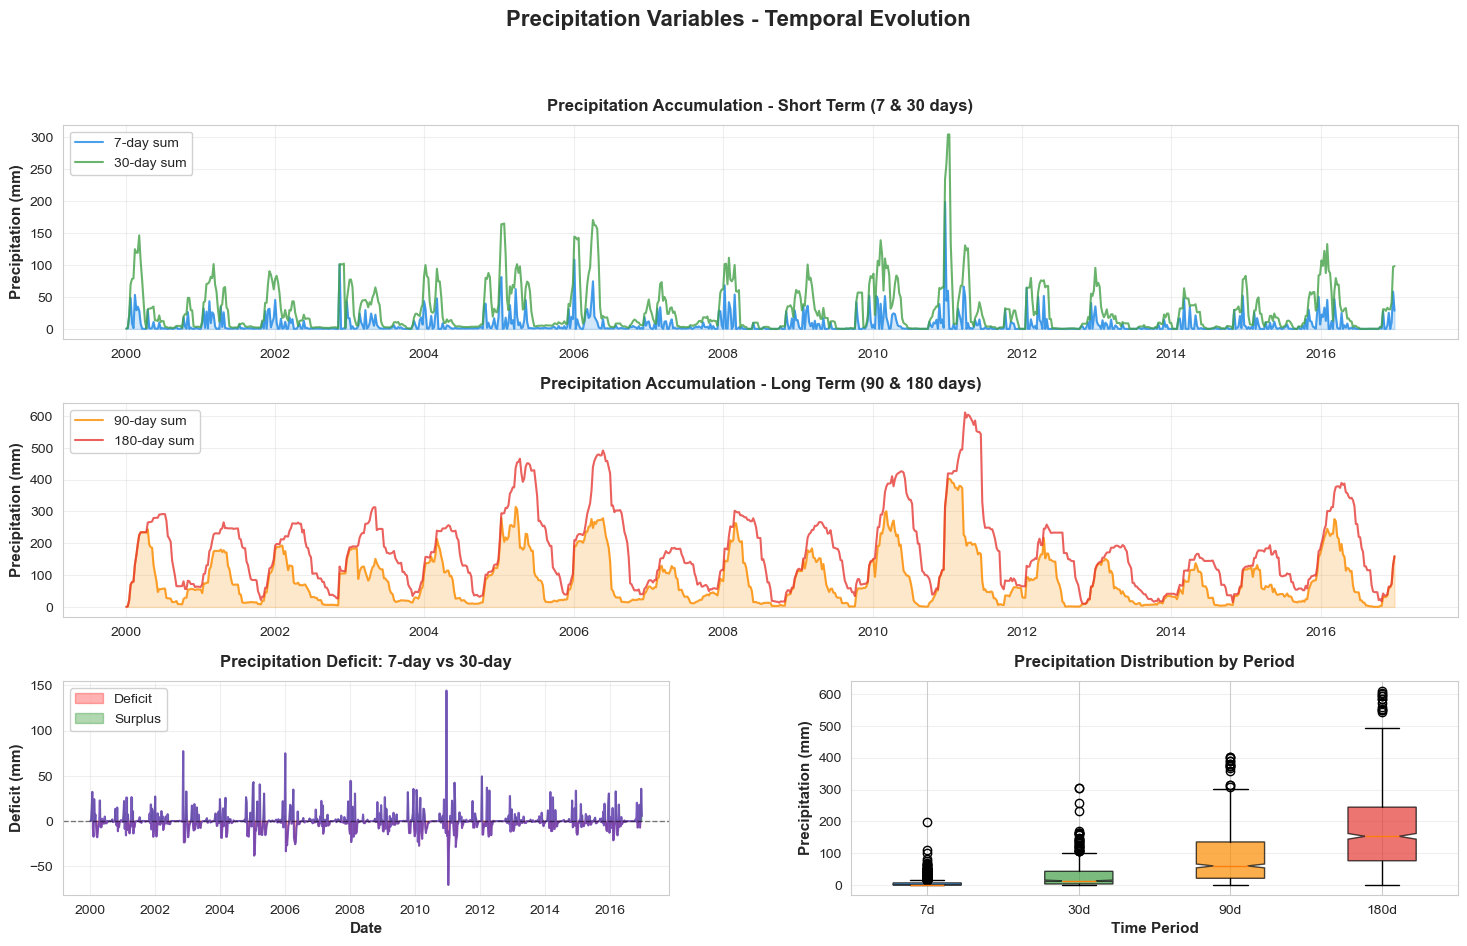

In [82]:
print("\nGenerating Figure 1: Precipitation Analysis...")

fig1 = plt.figure(figsize=(18, 10))
gs1 = GridSpec(3, 2, figure=fig1, hspace=0.3, wspace=0.3)
fig1.suptitle('Precipitation Variables - Temporal Evolution', fontsize=16, fontweight='bold', y=0.995)

# Precipitation sums over different periods
ax1 = fig1.add_subplot(gs1[0, :])
ax1.plot(df['date'], df['prec_sum_7d'], label='7-day sum', linewidth=1.5, alpha=0.8, color='#1E88E5')
ax1.plot(df['date'], df['prec_sum_30d'], label='30-day sum', linewidth=1.5, alpha=0.8, color='#43A047')
ax1.fill_between(df['date'], df['prec_sum_7d'], alpha=0.2, color='#1E88E5')
ax1.set_ylabel('Precipitation (mm)', fontsize=11, fontweight='bold')
ax1.set_title('Precipitation Accumulation - Short Term (7 & 30 days)', fontsize=12, fontweight='bold', pad=10)
ax1.legend(loc='upper left', framealpha=0.9)
ax1.grid(True, alpha=0.3)

# Longer-term precipitation
ax2 = fig1.add_subplot(gs1[1, :])
ax2.plot(df['date'], df['prec_sum_90d'], label='90-day sum', linewidth=1.5, alpha=0.8, color='#FB8C00')
ax2.plot(df['date'], df['prec_sum_180d'], label='180-day sum', linewidth=1.5, alpha=0.8, color='#E53935')
ax2.fill_between(df['date'], df['prec_sum_90d'], alpha=0.2, color='#FB8C00')
ax2.set_ylabel('Precipitation (mm)', fontsize=11, fontweight='bold')
ax2.set_title('Precipitation Accumulation - Long Term (90 & 180 days)', fontsize=12, fontweight='bold', pad=10)
ax2.legend(loc='upper left', framealpha=0.9)
ax2.grid(True, alpha=0.3)

# Precipitation deficit
ax3 = fig1.add_subplot(gs1[2, 0])
ax3.plot(df['date'], df['prec_deficit_7v30d'], linewidth=1.5, alpha=0.8, color='#5E35B1')
ax3.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax3.fill_between(df['date'], df['prec_deficit_7v30d'], 0, 
                 where=(df['prec_deficit_7v30d'] < 0), alpha=0.3, color='red', label='Deficit')
ax3.fill_between(df['date'], df['prec_deficit_7v30d'], 0, 
                 where=(df['prec_deficit_7v30d'] >= 0), alpha=0.3, color='green', label='Surplus')
ax3.set_ylabel('Deficit (mm)', fontsize=11, fontweight='bold')
ax3.set_xlabel('Date', fontsize=11, fontweight='bold')
ax3.set_title('Precipitation Deficit: 7-day vs 30-day', fontsize=12, fontweight='bold', pad=10)
ax3.legend(loc='upper left', framealpha=0.9)
ax3.grid(True, alpha=0.3)

# Distribution boxplot
ax4 = fig1.add_subplot(gs1[2, 1])
prec_data = [df['prec_sum_7d'].dropna(), df['prec_sum_30d'].dropna(), 
             df['prec_sum_90d'].dropna(), df['prec_sum_180d'].dropna()]
bp1 = ax4.boxplot(prec_data, labels=['7d', '30d', '90d', '180d'], patch_artist=True, notch=True)
colors = ['#1E88E5', '#43A047', '#FB8C00', '#E53935']
for patch, color in zip(bp1['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax4.set_ylabel('Precipitation (mm)', fontsize=11, fontweight='bold')
ax4.set_xlabel('Time Period', fontsize=11, fontweight='bold')
ax4.set_title('Precipitation Distribution by Period', fontsize=12, fontweight='bold', pad=10)
ax4.grid(axis='y', alpha=0.3)

plt.savefig('../notebooks/img/drought_precipitation_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Saved: drought_precipitation_analysis.png")

### Figure 2: Temperature Variables

Generating Figure 2: Temperature Analysis...
✓ Saved: drought_temperature_analysis.png


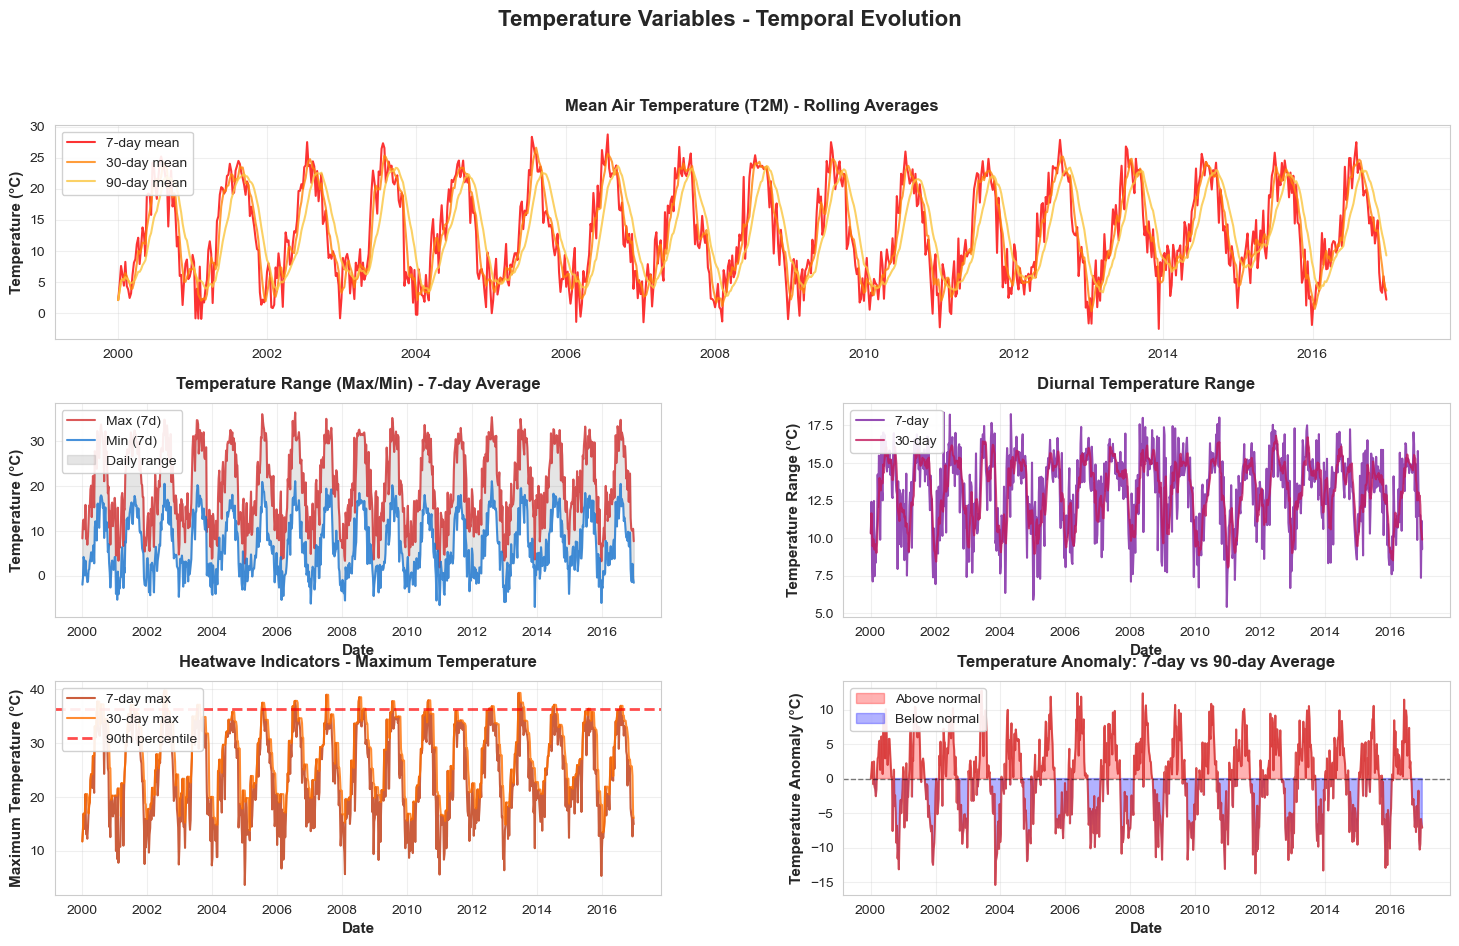

In [83]:
print("Generating Figure 2: Temperature Analysis...")

fig2 = plt.figure(figsize=(18, 10))
gs2 = GridSpec(3, 2, figure=fig2, hspace=0.3, wspace=0.3)
fig2.suptitle('Temperature Variables - Temporal Evolution', fontsize=16, fontweight='bold', y=0.995)

# Mean temperature over different periods
ax1 = fig2.add_subplot(gs2[0, :])
ax1.plot(df['date'], df['t2m_mean_7d'], label='7-day mean', linewidth=1.5, alpha=0.8, color="#FC0000")
ax1.plot(df['date'], df['t2m_mean_30d'], label='30-day mean', linewidth=1.5, alpha=0.8, color="#FF850B")
ax1.plot(df['date'], df['t2m_mean_90d'], label='90-day mean', linewidth=1.5, alpha=0.8, color="#FBC640")
ax1.set_ylabel('Temperature (°C)', fontsize=11, fontweight='bold')
ax1.set_title('Mean Air Temperature (T2M) - Rolling Averages', fontsize=12, fontweight='bold', pad=10)
ax1.legend(loc='upper left', framealpha=0.9)
ax1.grid(True, alpha=0.3)

# Max and Min temperature ranges
ax2 = fig2.add_subplot(gs2[1, 0])
ax2.plot(df['date'], df['t2m_max_mean_7d'], label='Max (7d)', linewidth=1.5, alpha=0.8, color='#D32F2F')
ax2.plot(df['date'], df['t2m_min_mean_7d'], label='Min (7d)', linewidth=1.5, alpha=0.8, color='#1976D2')
ax2.fill_between(df['date'], df['t2m_min_mean_7d'], df['t2m_max_mean_7d'], 
                 alpha=0.2, color='gray', label='Daily range')
ax2.set_ylabel('Temperature (°C)', fontsize=11, fontweight='bold')
ax2.set_xlabel('Date', fontsize=11, fontweight='bold')
ax2.set_title('Temperature Range (Max/Min) - 7-day Average', fontsize=12, fontweight='bold', pad=10)
ax2.legend(loc='upper left', framealpha=0.9)
ax2.grid(True, alpha=0.3)

# Temperature range variability
ax3 = fig2.add_subplot(gs2[1, 1])
ax3.plot(df['date'], df['t2m_range_mean_7d'], label='7-day', linewidth=1.5, alpha=0.8, color='#7B1FA2')
ax3.plot(df['date'], df['t2m_range_mean_30d'], label='30-day', linewidth=1.5, alpha=0.8, color='#C2185B')
ax3.set_ylabel('Temperature Range (°C)', fontsize=11, fontweight='bold')
ax3.set_xlabel('Date', fontsize=11, fontweight='bold')
ax3.set_title('Diurnal Temperature Range', fontsize=12, fontweight='bold', pad=10)
ax3.legend(loc='upper left', framealpha=0.9)
ax3.grid(True, alpha=0.3)

# Heatwave indicators (maximum temperatures)
ax4 = fig2.add_subplot(gs2[2, 0])
ax4.plot(df['date'], df['t2m_max_7d'], label='7-day max', linewidth=1.5, alpha=0.8, color='#BF360C')
ax4.plot(df['date'], df['t2m_max_30d'], label='30-day max', linewidth=1.5, alpha=0.8, color='#FF6F00')
ax4.axhline(y=df['t2m_max_30d'].quantile(0.90), color='red', linestyle='--', 
            linewidth=2, alpha=0.7, label='90th percentile')
ax4.set_ylabel('Maximum Temperature (°C)', fontsize=11, fontweight='bold')
ax4.set_xlabel('Date', fontsize=11, fontweight='bold')
ax4.set_title('Heatwave Indicators - Maximum Temperature', fontsize=12, fontweight='bold', pad=10)
ax4.legend(loc='upper left', framealpha=0.9)
ax4.grid(True, alpha=0.3)

# Temperature anomaly
ax5 = fig2.add_subplot(gs2[2, 1])
ax5.plot(df['date'], df['temp_anomaly_7v90d'], linewidth=1.5, alpha=0.8, color='#D32F2F')
ax5.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax5.fill_between(df['date'], df['temp_anomaly_7v90d'], 0, 
                 where=(df['temp_anomaly_7v90d'] > 0), alpha=0.3, color='red', label='Above normal')
ax5.fill_between(df['date'], df['temp_anomaly_7v90d'], 0, 
                 where=(df['temp_anomaly_7v90d'] <= 0), alpha=0.3, color='blue', label='Below normal')
ax5.set_ylabel('Temperature Anomaly (°C)', fontsize=11, fontweight='bold')
ax5.set_xlabel('Date', fontsize=11, fontweight='bold')
ax5.set_title('Temperature Anomaly: 7-day vs 90-day Average', fontsize=12, fontweight='bold', pad=10)
ax5.legend(loc='upper left', framealpha=0.9)
ax5.grid(True, alpha=0.3)

plt.savefig('../notebooks/img/drought_temperature_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Saved: drought_temperature_analysis.png")

### Figure 3: Humidity Variables

Generating Figure 3: Humidity Analysis...
✓ Saved: drought_humidity_analysis.png


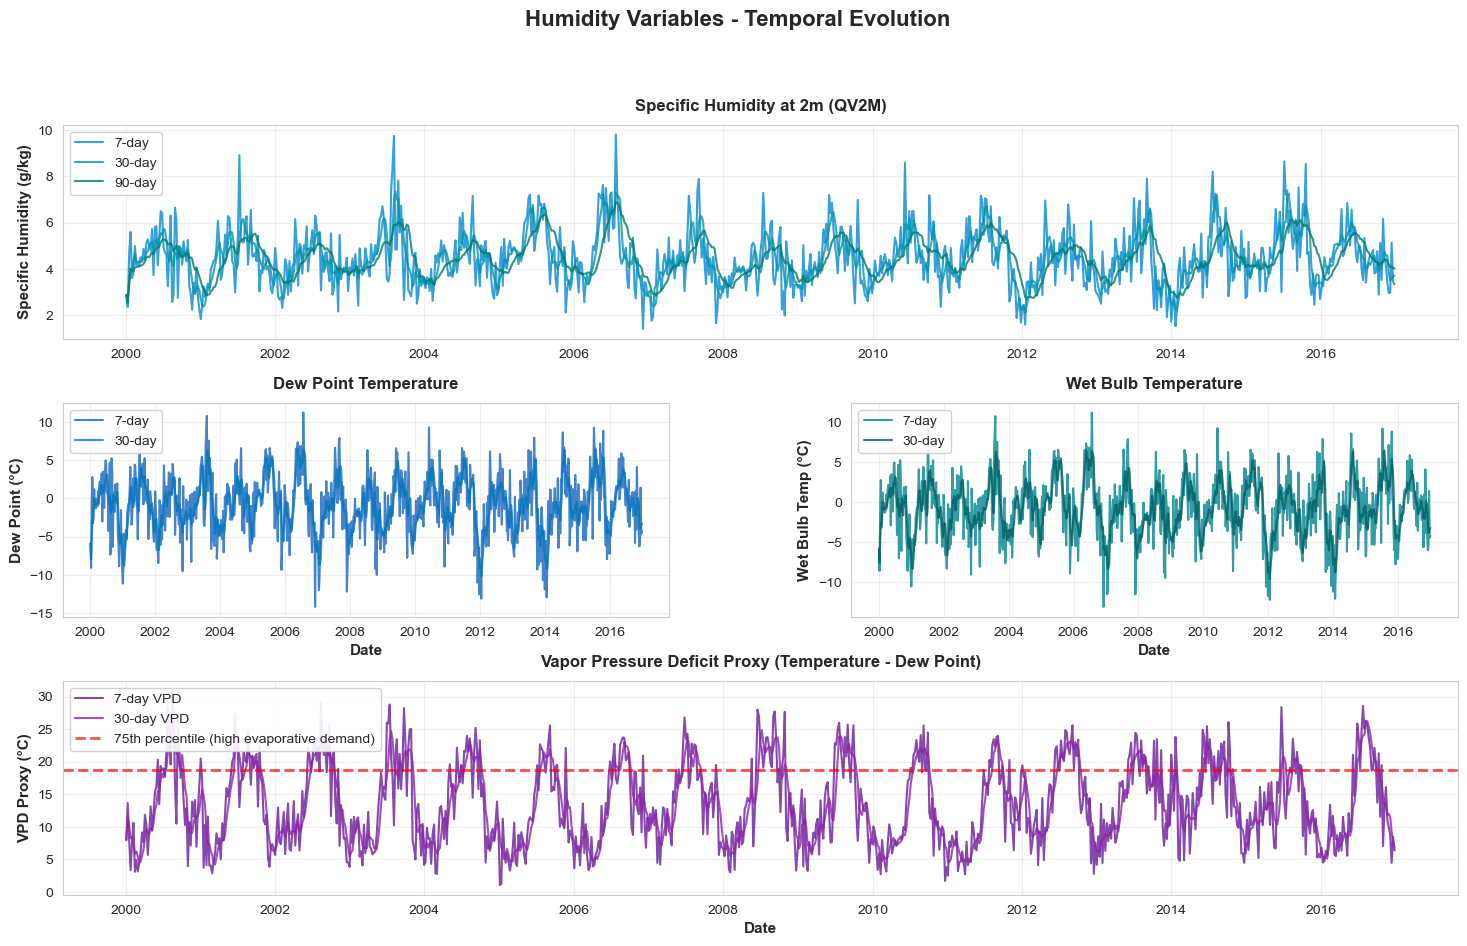

In [84]:
print("Generating Figure 3: Humidity Analysis...")

fig3 = plt.figure(figsize=(18, 10))
gs3 = GridSpec(3, 2, figure=fig3, hspace=0.3, wspace=0.3)
fig3.suptitle('Humidity Variables - Temporal Evolution', fontsize=16, fontweight='bold', y=0.995)

# Specific humidity (QV2M)
ax1 = fig3.add_subplot(gs3[0, :])
ax1.plot(df['date'], df['qv2m_mean_7d'], label='7-day', linewidth=1.5, alpha=0.8, color='#0288D1')
ax1.plot(df['date'], df['qv2m_mean_30d'], label='30-day', linewidth=1.5, alpha=0.8, color='#0097A7')
ax1.plot(df['date'], df['qv2m_mean_90d'], label='90-day', linewidth=1.5, alpha=0.8, color='#00796B')
ax1.set_ylabel('Specific Humidity (g/kg)', fontsize=11, fontweight='bold')
ax1.set_title('Specific Humidity at 2m (QV2M)', fontsize=12, fontweight='bold', pad=10)
ax1.legend(loc='upper left', framealpha=0.9)
ax1.grid(True, alpha=0.3)

# Dew point temperature
ax2 = fig3.add_subplot(gs3[1, 0])
ax2.plot(df['date'], df['t2mdew_mean_7d'], label='7-day', linewidth=1.5, alpha=0.8, color='#1565C0')
ax2.plot(df['date'], df['t2mdew_mean_30d'], label='30-day', linewidth=1.5, alpha=0.8, color='#0277BD')
ax2.set_ylabel('Dew Point (°C)', fontsize=11, fontweight='bold')
ax2.set_xlabel('Date', fontsize=11, fontweight='bold')
ax2.set_title('Dew Point Temperature', fontsize=12, fontweight='bold', pad=10)
ax2.legend(loc='upper left', framealpha=0.9)
ax2.grid(True, alpha=0.3)

# Wet bulb temperature
ax3 = fig3.add_subplot(gs3[1, 1])
ax3.plot(df['date'], df['t2mwet_mean_7d'], label='7-day', linewidth=1.5, alpha=0.8, color='#00838F')
ax3.plot(df['date'], df['t2mwet_mean_30d'], label='30-day', linewidth=1.5, alpha=0.8, color='#006064')
ax3.set_ylabel('Wet Bulb Temp (°C)', fontsize=11, fontweight='bold')
ax3.set_xlabel('Date', fontsize=11, fontweight='bold')
ax3.set_title('Wet Bulb Temperature', fontsize=12, fontweight='bold', pad=10)
ax3.legend(loc='upper left', framealpha=0.9)
ax3.grid(True, alpha=0.3)

# Vapor Pressure Deficit Proxy
ax4 = fig3.add_subplot(gs3[2, :])
ax4.plot(df['date'], df['vpd_proxy_7d'], label='7-day VPD', linewidth=1.5, alpha=0.8, color='#6A1B9A')
ax4.plot(df['date'], df['vpd_proxy_30d'], label='30-day VPD', linewidth=1.5, alpha=0.8, color='#8E24AA')
ax4.axhline(y=df['vpd_proxy_30d'].quantile(0.75), color='red', linestyle='--', 
            linewidth=2, alpha=0.7, label='75th percentile (high evaporative demand)')
ax4.set_ylabel('VPD Proxy (°C)', fontsize=11, fontweight='bold')
ax4.set_xlabel('Date', fontsize=11, fontweight='bold')
ax4.set_title('Vapor Pressure Deficit Proxy (Temperature - Dew Point)', fontsize=12, fontweight='bold', pad=10)
ax4.legend(loc='upper left', framealpha=0.9)
ax4.grid(True, alpha=0.3)

plt.savefig('../notebooks/img/drought_humidity_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Saved: drought_humidity_analysis.png")

### Figure 4: Drought Score with Key Variables

Generating Figure 6: Drought Score with Key Variables...
✓ Saved: drought_score_vs_variables.png


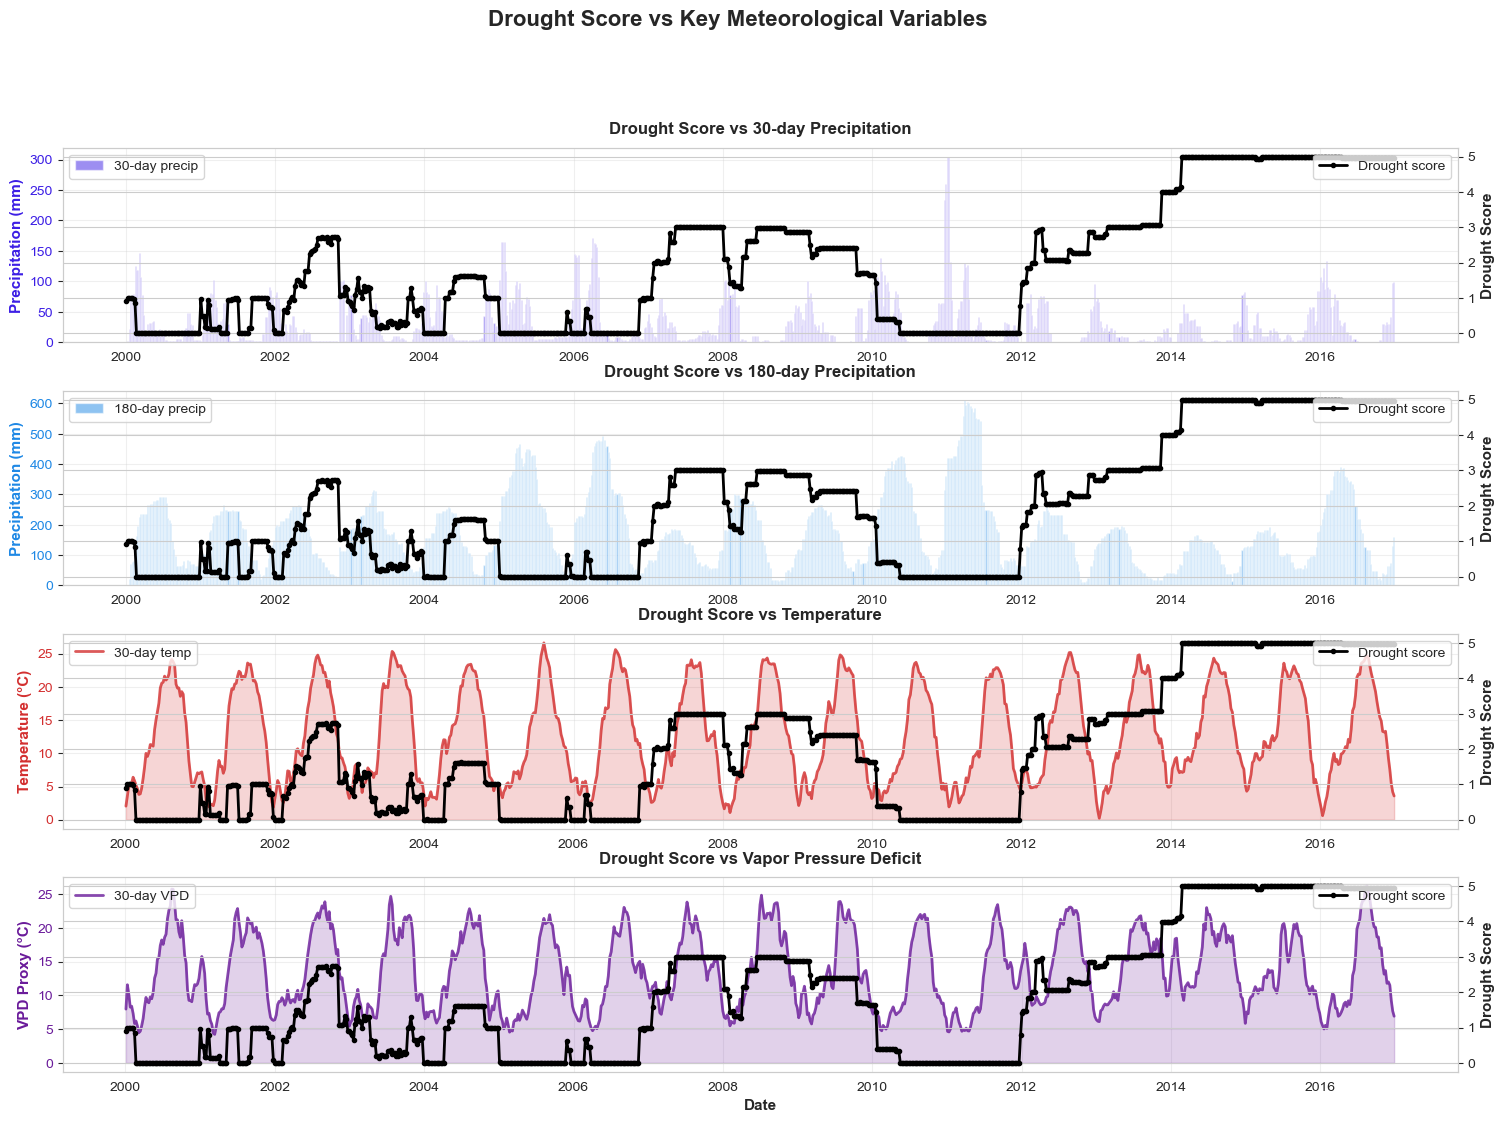

In [85]:
print("Generating Figure 6: Drought Score with Key Variables...")

fig6 = plt.figure(figsize=(18, 12))
gs6 = GridSpec(4, 1, figure=fig6, hspace=0.25)
fig6.suptitle('Drought Score vs Key Meteorological Variables', fontsize=16, fontweight='bold', y=0.995)

# With precipitation 30d
ax1 = fig6.add_subplot(gs6[0])
ax1_score = ax1.twinx()
ax1.bar(df['date'], df['prec_sum_30d'], alpha=0.5, color="#3C1EE5", width=5, label='30-day precip')
ax1_score.plot(df['date'], df['score'], linewidth=2, color='#000000', marker='o', markersize=3, label='Drought score')
ax1.set_ylabel('Precipitation (mm)', fontsize=11, fontweight='bold', color='#3C1EE5')
ax1_score.set_ylabel('Drought Score', fontsize=11, fontweight='bold')
ax1.tick_params(axis='y', labelcolor='#3C1EE5')
ax1.set_title('Drought Score vs 30-day Precipitation', fontsize=12, fontweight='bold', pad=10)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper left')
ax1_score.legend(loc='upper right')

# With precipitation 180d
ax2 = fig6.add_subplot(gs6[1])
ax2_score = ax2.twinx()
ax2.bar(df['date'], df['prec_sum_180d'], alpha=0.5, color='#1E88E5', width=5, label='180-day precip')
ax2_score.plot(df['date'], df['score'], linewidth=2, color='#000000', marker='o', markersize=3, label='Drought score')
ax2.set_ylabel('Precipitation (mm)', fontsize=11, fontweight='bold', color='#1E88E5')
ax2_score.set_ylabel('Drought Score', fontsize=11, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='#1E88E5')
ax2.set_title('Drought Score vs 180-day Precipitation', fontsize=12, fontweight='bold', pad=10)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper left')
ax2_score.legend(loc='upper right')

# With temperature
ax3 = fig6.add_subplot(gs6[2])
ax3_score = ax3.twinx()
ax3.plot(df['date'], df['t2m_mean_30d'], linewidth=2, alpha=0.8, color='#D32F2F', label='30-day temp')
ax3.fill_between(df['date'], df['t2m_mean_30d'], alpha=0.2, color='#D32F2F')
ax3_score.plot(df['date'], df['score'], linewidth=2, color='#000000', marker='o', markersize=3, label='Drought score')
ax3.set_ylabel('Temperature (°C)', fontsize=11, fontweight='bold', color='#D32F2F')
ax3_score.set_ylabel('Drought Score', fontsize=11, fontweight='bold')
ax3.tick_params(axis='y', labelcolor='#D32F2F')
ax3.set_title('Drought Score vs Temperature', fontsize=12, fontweight='bold', pad=10)
ax3.grid(True, alpha=0.3)
ax3.legend(loc='upper left')
ax3_score.legend(loc='upper right')

# With VPD proxy
ax4 = fig6.add_subplot(gs6[3])
ax4_score = ax4.twinx()
ax4.plot(df['date'], df['vpd_proxy_30d'], linewidth=2, alpha=0.8, color='#6A1B9A', label='30-day VPD')
ax4.fill_between(df['date'], df['vpd_proxy_30d'], alpha=0.2, color='#6A1B9A')
ax4_score.plot(df['date'], df['score'], linewidth=2, color='#000000', marker='o', markersize=3, label='Drought score')
ax4.set_ylabel('VPD Proxy (°C)', fontsize=11, fontweight='bold', color='#6A1B9A')
ax4_score.set_ylabel('Drought Score', fontsize=11, fontweight='bold')
ax4.tick_params(axis='y', labelcolor='#6A1B9A')
ax4.set_xlabel('Date', fontsize=11, fontweight='bold')
ax4.set_title('Drought Score vs Vapor Pressure Deficit', fontsize=12, fontweight='bold', pad=10)
ax4.grid(True, alpha=0.3)
ax4.legend(loc='upper left')
ax4_score.legend(loc='upper right')

plt.savefig('../notebooks/img/drought_score_vs_variables.png', dpi=300, bbox_inches='tight')
print("✓ Saved: drought_score_vs_variables.png")


### Summary

In [86]:
print("\n" + "="*80)
print("ALL PLOTS GENERATED SUCCESSFULLY")
print("="*80)
print("\nGenerated files:")
print("1. drought_precipitation_analysis.png - Precipitation variables")
print("2. drought_temperature_analysis.png - Temperature variables")
print("3. drought_humidity_analysis.png - Humidity variables")
print("4. drought_score_vs_variables.png - Drought score comparisons")
print("\nTotal: 4 comprehensive figures with individual variable analysis")
print("="*80)


ALL PLOTS GENERATED SUCCESSFULLY

Generated files:
1. drought_precipitation_analysis.png - Precipitation variables
2. drought_temperature_analysis.png - Temperature variables
3. drought_humidity_analysis.png - Humidity variables
4. drought_score_vs_variables.png - Drought score comparisons

Total: 4 comprehensive figures with individual variable analysis


## Evaluation plotocol

For the following steps, the three generated reprocessed datasets (train, validation, and test) will be used to train and evaluate different machine learning models:
- `data/generated_data/fips_6107_drought_features_train.csv`
- `data/generated_data/fips_6107_drought_features_validation.csv`
- `data/generated_data/fips_6107_drought_features_test.csv`

Assuming this splitting format, it is necessary to evaluate the classes balance of the target variable `score` in each dataset to ensure that the models are trained and evaluated on representative samples.

### Baseline Model
- **Logistic Regression** is a good baseline model because it is simple, fast to train, and easy to interpret. It provides a clear probabilistic output and helps establish a reference performance before testing more complex models. Despite its simplicity, it can capture basic relationships between meteorological variables and drought severity, making it a useful starting point for comparison.

### Two Tree-Based Models
- **Random Forest Classifier** is a strong choice for drought classification because it can model complex and nonlinear relationships between meteorological variables while remaining stable and resistant to overfitting. It works well with both continuous and categorical data and is not sensitive to feature scaling. Random Forests are also robust to noise and outliers, which are common in environmental observations. Moreover, they can handle class imbalance through class weighting and provide feature importance measures, helping to identify which variables most influence drought severity. 

- **Gradient Boosting Classifier** is well-suited for drought classification because it can capture complex nonlinear relationships between meteorological variables such as temperature, humidity, and precipitation. It handles mixed data types without requiring much preprocessing and is robust to correlated features and outliers, which are common in environmental datasets. Additionally, it allows the use of class weighting to address class imbalance (which is the case for this dataset), often present when severe drought events are less frequent. Finally, Gradient Boosting provides feature importance measures, offering interpretability and insights into which variables contribute most to drought severity, making it a strong and reliable choice.

### Data Splitting Strategy
- The data is already split into **train**, **validation**, and **test** sets.
- The **training set** will be used for model fitting.
- The **validation set** will be used for **hyperparameter tuning** and **model selection**.
- The **test set** will be used **only once** for final evaluation.
- This ensures **no data leakage** between splits.

It is necessary to evaluate the class distribution of the target variable `score` across all three datasets.

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Define file paths
paths = {
    'train': '../data/generated_data/fips_6107_drought_features_train.csv',
    'validation': '../data/generated_data/fips_6107_drought_features_validation.csv',
    'test': '../data/generated_data/fips_6107_drought_features_test.csv'
}

# Store results for plotting
all_counts = {}

for split, path in paths.items():
    df = pd.read_csv(path)
    df['score'] = df['score'].round(0).astype(int)
    class_counts = df['score'].value_counts().sort_index()
    
    all_counts[split] = class_counts
    print(f"\nClass distribution in {split} set:")
    print(class_counts)



Class distribution in train set:
score
0    309
1    127
2    135
3    153
4     14
5    149
Name: count, dtype: int64

Class distribution in validation set:
score
0    48
1    40
2     5
3     8
4     2
5     1
Name: count, dtype: int64

Class distribution in test set:
score
0    48
1    34
2    19
3     4
Name: count, dtype: int64


Classes are imbalanced, with `0` (no drought) being the most frequent class. For the test set there's not even a single instance of class `D4` or `D5`. The good sign is that all classes are represented in the training and validation sets.

<Figure size 800x500 with 0 Axes>

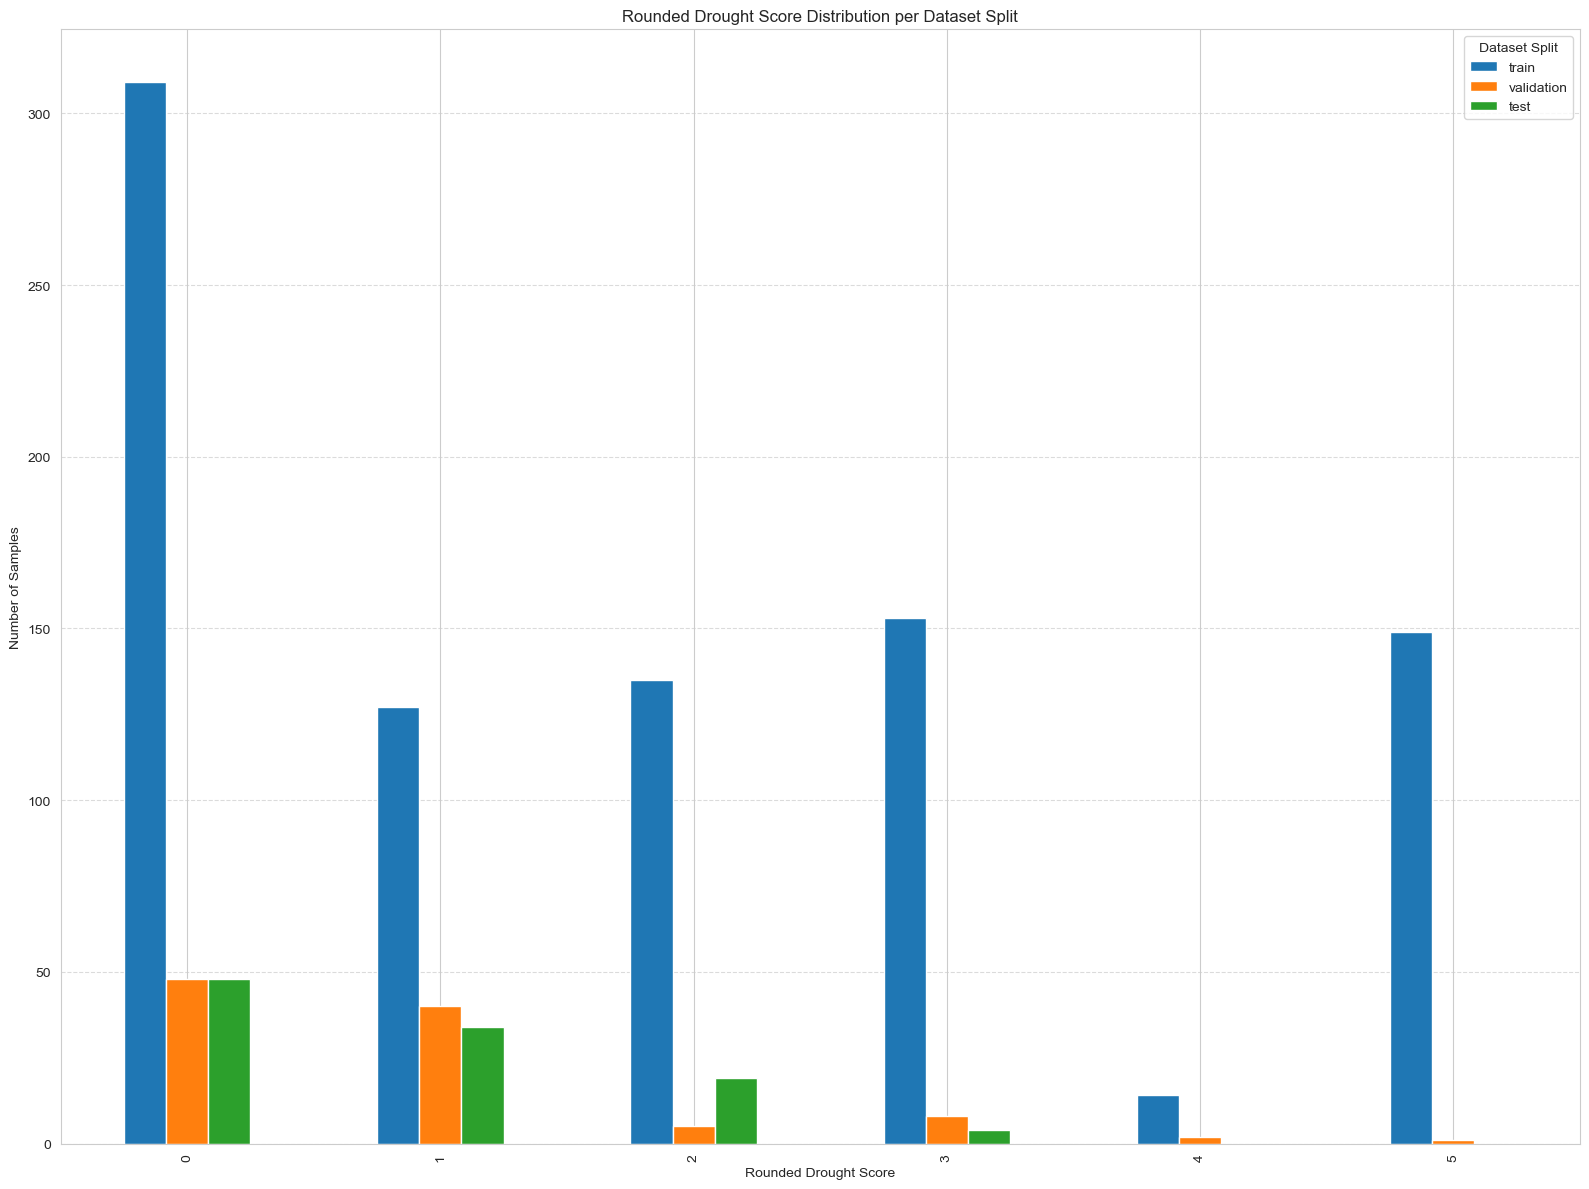

In [88]:
# Convert to DataFrame for plotting
class_counts_df = pd.DataFrame(all_counts).fillna(0).astype(int)

# Plot absolute class counts
plt.figure(figsize=(8, 5))
class_counts_df.plot(kind='bar')
plt.title('Rounded Drought Score Distribution per Dataset Split')
plt.xlabel('Rounded Drought Score')
plt.ylabel('Number of Samples')
plt.legend(title='Dataset Split')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Hyperparameter Tuning Protocol
- Use **GridSearchCV** or **RandomizedSearchCV** with **cross-validation** (5-fold) on the **training + validation data**.
- The best parameters will be selected based on the validation performance.
- The model will then be retrained on the combined training and validation sets and evaluated on the **test set**.

### Evaluation Metrics
We will use the following metrics to evaluate and compare models:

1. **Accuracy** – overall correctness of predictions.
2. **F1-score** – harmonic mean of precision and recall (useful for imbalanced data).
3. **Confusion Matrix** – visual representation of class-level performance.

These metrics will be computed for both validation and test sets to assess consistency and generalization.
